In [1]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Preprocess messages
nltk.download('punkt')
nltk.download('stopwords')

# Load dataset
df = pd.read_csv('ScamDataset', sep='\t', names=['Label', 'message'])



stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess(text):
    tokens = word_tokenize(text)
    stemmed = [stemmer.stem(word) for word in tokens if word.isalpha() and word not in stop_words]
    return ' '.join(stemmed)

df['processed_message'] = df['message'].apply(preprocess)
df['processed_message']
# df['Label'] = df['Label'].map({'normal': 0, 'fraud': 1})

# df['Label']

# # Count the number of 'fraud' entries
# fraud_count = (df['Label'] == 1).sum()
# non_fraud_count = (df['Label'] == 0).sum()
# print(f'Number of fraud data: {fraud_count}')
# print(f'Number of non fraud data: {non_fraud_count}')

[nltk_data] Downloading package punkt to /Users/nicholas/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nicholas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0        go jurong point crazi avail bugi n great world...
1                                    ok lar joke wif u oni
2        free entri wkli comp win fa cup final tkt may ...
3                      u dun say earli hor u c alreadi say
4                   nah i think goe usf live around though
                               ...                        
11489                           get inr voucher pleas call
11490    get free access googl cloud account hit given ...
11491    get free aw cloud account hit given messag box...
11492    get free access microsoft azur hit given messa...
11493    hello sir bank fill applic form credit card ve...
Name: processed_message, Length: 11494, dtype: object

In [2]:
# Vectorize messages
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df['processed_message']).toarray()
df['Label'] = df['Label'].map({'normal': 0, 'fraud': 1})  # Adjust as necessary based on your actual labels

y = df['Label']

In [3]:
from sklearn.model_selection import train_test_split

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [4]:


# Initialize an empty dictionary to store accuracies
accuracies = {}

# Initialize an empty dictionary to store loss
loss = {}

In [5]:
from sklearn.naive_bayes import MultinomialNB

# Naive Bayes
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracies['NB'] = accuracy
print(f"Naive Bayes Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))



Naive Bayes Accuracy: 0.9805
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      2536
           1       0.98      0.85      0.91       338

    accuracy                           0.98      2874
   macro avg       0.98      0.92      0.95      2874
weighted avg       0.98      0.98      0.98      2874



In [6]:
from sklearn.svm import SVC

#SVC
model = SVC(kernel='linear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracies['SVC'] = accuracy
print(f"SVC: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))


SVC: 0.9864
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      2536
           1       0.98      0.91      0.94       338

    accuracy                           0.99      2874
   macro avg       0.98      0.95      0.97      2874
weighted avg       0.99      0.99      0.99      2874



In [7]:
from sklearn.ensemble import RandomForestClassifier

#Random Forest
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracies['Random Forest'] = accuracy
print(f"Random Forest Classifier: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))


Random Forest Classifier: 0.9903
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      2536
           1       0.98      0.93      0.96       338

    accuracy                           0.99      2874
   macro avg       0.99      0.96      0.98      2874
weighted avg       0.99      0.99      0.99      2874



In [8]:
from sklearn.linear_model import LogisticRegression

#Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracies['Logistic Regression'] = accuracy
print(f"Logistic Regression: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))


Logistic Regression: 0.9743
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      2536
           1       0.98      0.80      0.88       338

    accuracy                           0.97      2874
   macro avg       0.98      0.90      0.93      2874
weighted avg       0.97      0.97      0.97      2874



In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, SpatialDropout1D
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import EarlyStopping

# Deep Learning Model: Simple LSTM
# Tokenize text
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(df['message'])
X = tokenizer.texts_to_sequences(df['message'])
X = pad_sequences(X, maxlen=50)

# Split dataset 80:20
X_train, X_test, y_train, y_test = train_test_split(X, df['Label'], test_size=0.2, random_state=42)


# Build LSTM model
model = Sequential()
model.add(Embedding(1000, 128, input_length=50))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train
early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1)
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.1, callbacks=[early_stop], verbose=2)

# Evaluate
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f"LSTM Model Accuracy: {accuracy:.4f}")


Epoch 1/10
130/130 - 11s - loss: 0.1631 - accuracy: 0.9459 - val_loss: 0.0413 - val_accuracy: 0.9891 - 11s/epoch - 83ms/step
Epoch 2/10
130/130 - 10s - loss: 0.0426 - accuracy: 0.9886 - val_loss: 0.0372 - val_accuracy: 0.9902 - 10s/epoch - 80ms/step
Epoch 3/10
130/130 - 10s - loss: 0.0286 - accuracy: 0.9921 - val_loss: 0.0255 - val_accuracy: 0.9935 - 10s/epoch - 79ms/step
Epoch 4/10
130/130 - 10s - loss: 0.0227 - accuracy: 0.9949 - val_loss: 0.0249 - val_accuracy: 0.9935 - 10s/epoch - 79ms/step
Epoch 5/10
130/130 - 10s - loss: 0.0171 - accuracy: 0.9955 - val_loss: 0.0383 - val_accuracy: 0.9902 - 10s/epoch - 79ms/step
Epoch 6/10
130/130 - 10s - loss: 0.0147 - accuracy: 0.9959 - val_loss: 0.0257 - val_accuracy: 0.9924 - 10s/epoch - 77ms/step
Epoch 7/10
130/130 - 10s - loss: 0.0117 - accuracy: 0.9967 - val_loss: 0.0211 - val_accuracy: 0.9946 - 10s/epoch - 76ms/step
Epoch 8/10
130/130 - 10s - loss: 0.0101 - accuracy: 0.9975 - val_loss: 0.0272 - val_accuracy: 0.9935 - 10s/epoch - 76ms/step


In [10]:

# Split dataset 70:30
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, df['Label'], test_size=0.3, random_state=42)

history = model.fit(X_train2, y_train2, epochs=10, batch_size=64, validation_split=0.1, callbacks=[early_stop], verbose=2)

# Evaluate
loss, accuracy = model.evaluate(X_test2, y_test2, verbose=0)
print(f"LSTM Model Accuracy: {accuracy:.4f}")


Epoch 1/10
114/114 - 9s - loss: 0.0084 - accuracy: 0.9978 - val_loss: 0.0322 - val_accuracy: 0.9938 - 9s/epoch - 78ms/step
Epoch 2/10
114/114 - 9s - loss: 0.0087 - accuracy: 0.9977 - val_loss: 0.0291 - val_accuracy: 0.9925 - 9s/epoch - 78ms/step
Epoch 3/10
114/114 - 9s - loss: 0.0077 - accuracy: 0.9974 - val_loss: 0.0353 - val_accuracy: 0.9888 - 9s/epoch - 78ms/step
Epoch 4/10
114/114 - 9s - loss: 0.0089 - accuracy: 0.9974 - val_loss: 0.0337 - val_accuracy: 0.9888 - 9s/epoch - 78ms/step
Epoch 5/10
114/114 - 9s - loss: 0.0057 - accuracy: 0.9983 - val_loss: 0.0356 - val_accuracy: 0.9888 - 9s/epoch - 77ms/step
Epoch 5: early stopping
LSTM Model Accuracy: 0.9933


In [11]:
# Split dataset 75:25
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, df['Label'], test_size=0.25, random_state=42)

history = model.fit(X_train2, y_train2, epochs=10, batch_size=64, validation_split=0.1, callbacks=[early_stop], verbose=2)

# Evaluate
loss, accuracy = model.evaluate(X_test2, y_test2, verbose=0)
accuracies['LSTM'] = accuracy

print(f"LSTM Model Accuracy: {accuracy:.4f}")

Epoch 1/10
122/122 - 9s - loss: 0.0046 - accuracy: 0.9988 - val_loss: 0.0385 - val_accuracy: 0.9907 - 9s/epoch - 77ms/step
Epoch 2/10
122/122 - 9s - loss: 0.0033 - accuracy: 0.9988 - val_loss: 0.0476 - val_accuracy: 0.9896 - 9s/epoch - 77ms/step
Epoch 3/10
122/122 - 9s - loss: 0.0037 - accuracy: 0.9988 - val_loss: 0.0424 - val_accuracy: 0.9907 - 9s/epoch - 77ms/step
Epoch 4/10
122/122 - 9s - loss: 0.0037 - accuracy: 0.9988 - val_loss: 0.0353 - val_accuracy: 0.9919 - 9s/epoch - 77ms/step
Epoch 5/10
122/122 - 9s - loss: 0.0033 - accuracy: 0.9988 - val_loss: 0.0354 - val_accuracy: 0.9884 - 9s/epoch - 76ms/step
Epoch 6/10
122/122 - 9s - loss: 0.0036 - accuracy: 0.9988 - val_loss: 0.0355 - val_accuracy: 0.9884 - 9s/epoch - 77ms/step
Epoch 7/10
122/122 - 9s - loss: 0.0064 - accuracy: 0.9976 - val_loss: 0.0685 - val_accuracy: 0.9884 - 9s/epoch - 77ms/step
Epoch 7: early stopping
LSTM Model Accuracy: 0.9885


In [12]:
# Split dataset 60:40
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, df['Label'], test_size=0.4, random_state=42)

history = model.fit(X_train3, y_train3, epochs=10, batch_size=64, validation_split=0.1, callbacks=[early_stop], verbose=2)

# Evaluate
loss, accuracy = model.evaluate(X_test3, y_test3, verbose=0)
print(f"LSTM Model Accuracy: {accuracy:.4f}")



Epoch 1/10
97/97 - 8s - loss: 0.0113 - accuracy: 0.9966 - val_loss: 0.0650 - val_accuracy: 0.9870 - 8s/epoch - 81ms/step
Epoch 2/10
97/97 - 8s - loss: 0.0056 - accuracy: 0.9982 - val_loss: 0.0506 - val_accuracy: 0.9899 - 8s/epoch - 80ms/step
Epoch 3/10
97/97 - 8s - loss: 0.0034 - accuracy: 0.9990 - val_loss: 0.0696 - val_accuracy: 0.9899 - 8s/epoch - 78ms/step
Epoch 4/10
97/97 - 8s - loss: 0.0024 - accuracy: 0.9992 - val_loss: 0.0793 - val_accuracy: 0.9899 - 8s/epoch - 78ms/step
Epoch 5/10
97/97 - 8s - loss: 0.0022 - accuracy: 0.9992 - val_loss: 0.0783 - val_accuracy: 0.9899 - 8s/epoch - 78ms/step
Epoch 5: early stopping
LSTM Model Accuracy: 0.9943


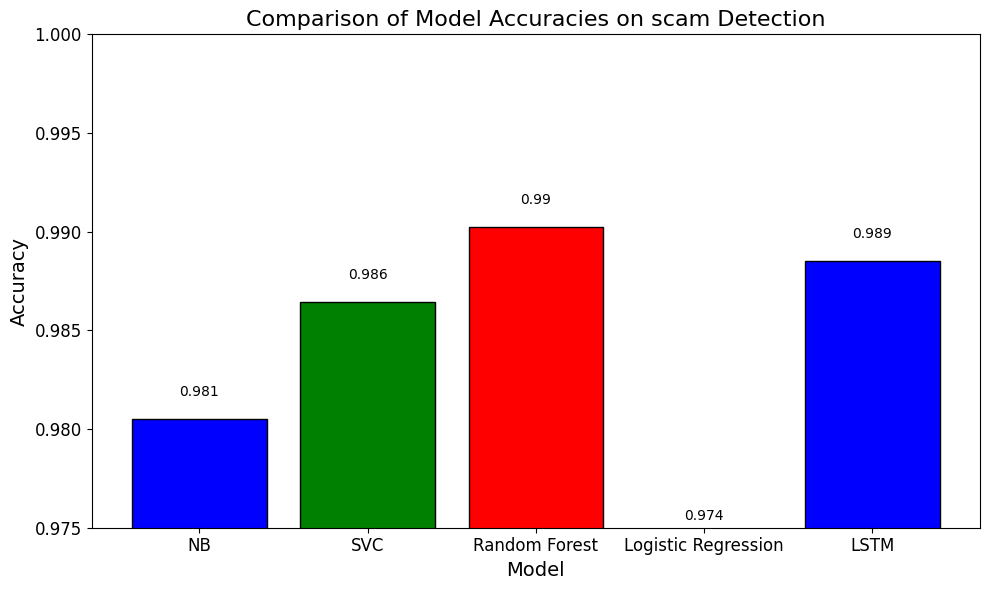

In [13]:
import matplotlib.pyplot as plt
# Plotting the accuracies using a more distinct graph style
plt.figure(figsize=(10, 6))

# Create a bar graph with distinct colors and edge color
bars = plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'green', 'red', 'purple'], edgecolor='black')

# Add data labels above each bar for clarity
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.001, round(yval, 3), ha='center', va='bottom')

plt.xlabel('Model', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Comparison of Model Accuracies on scam Detection', fontsize=16)
plt.ylim(0.975, 1)  # Set y-axis limit to make differences more distinct
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()